# March 2020 Dataset of Ford GoBike System

It is a public bicycle sharing platform in SanFransisco. The bicycles are available for the people at any point of time for easy and reasonable transportation.

In [1]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#reading the csv file
df=pd.read_csv('202003-baywheels-tripdata.csv')

In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,35187,2020-03-31 20:42:10.0790,2020-04-01 06:28:37.8440,462.0,Cruise Terminal at Pier 27,37.804648,-122.402087,24.0,Spear St at Folsom St,37.789677,-122.390428,10982,Customer,NaN
1,14568,2020-03-31 22:45:25.5010,2020-04-01 02:48:13.7730,42.0,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,370.0,Jones St at Post St,37.787327,-122.413278,12617,Customer,NaN
2,35990,2020-03-31 15:08:22.3310,2020-04-01 01:08:12.9900,391.0,1st St at Younger Ave,37.355030,-121.904436,397.0,Gish Rd at 1st St,37.361867,-121.909315,12812,Customer,NaN
3,1068,2020-03-31 23:55:00.4260,2020-04-01 00:12:49.0200,456.0,Arguello Blvd at Geary Blvd,37.781468,-122.458806,107.0,17th St at Dolores St,37.763015,-122.426497,12955,Customer,NaN
4,3300,2020-03-31 23:00:55.6410,2020-03-31 23:55:56.6110,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,24.0,Spear St at Folsom St,37.789677,-122.390428,13050,Customer,NaN


In [4]:
#checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176799 entries, 0 to 176798
Data columns (total 14 columns):
duration_sec               176799 non-null int64
start_time                 176799 non-null object
end_time                   176799 non-null object
start_station_id           110696 non-null float64
start_station_name         111349 non-null object
start_station_latitude     176799 non-null float64
start_station_longitude    176799 non-null float64
end_station_id             111097 non-null float64
end_station_name           111794 non-null object
end_station_latitude       176799 non-null float64
end_station_longitude      176799 non-null float64
bike_id                    176799 non-null int64
user_type                  176799 non-null object
rental_access_method       114269 non-null object
dtypes: float64(6), int64(2), object(6)
memory usage: 18.9+ MB


In [5]:
#num of rows and columns
df.shape

(176799, 14)

# Cleaning

In [6]:
#converting start time and end time to time stamp

df.start_time=pd.to_datetime(df.start_time)
df.end_time=pd.to_datetime(df.end_time)

In [7]:
df['starting_hour']=df.start_time.dt.hour
df['duration_in_min']=df.duration_sec/60
df['starting_day']=df.start_time.dt.strftime('%a')
df['starting_month']=df.start_time.dt.strftime('%b')

# Our point of interest for the data analysis
Most common start stations
Most common end stations
The average duration of riding
The average distance travelled
Maximum distance travelled
Minimum distance travelled
What is the minimun distance travelled?

# Most common start point  
From the visualization it is clear that the most
common start station is San Francisco
Caltrain.
It has around 2000 pickup record.

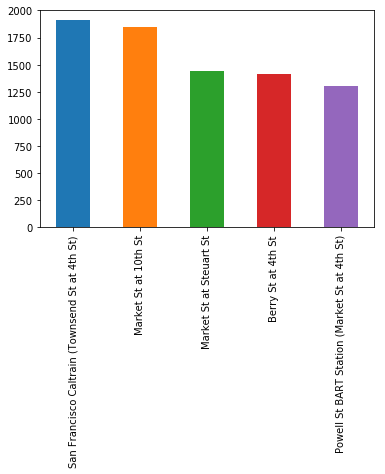

In [8]:
df.start_station_name.value_counts()[0:5].plot(kind='bar')

# Most common end station
Also, the most common end station is San Francisco Caltrain. It has the count
above 2500.

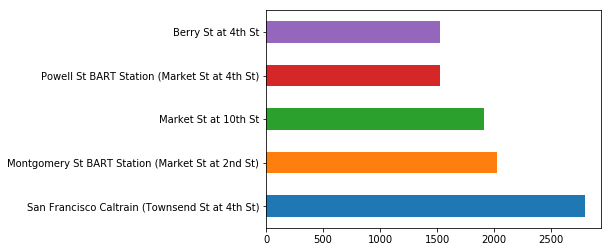

In [9]:
df.end_station_name.value_counts()[0:5].plot(kind='barh')

# Most busy hours of the day
Looking at the
countplot, we can
see that the most
busy/active hours of
the day are 5pm and
8am as well.

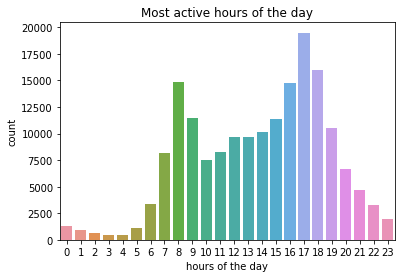

In [10]:
sns.countplot(df.starting_hour)
plt.xlabel('hours of the day')
plt.ylabel('count')
plt.title('Most active hours of the day')
plt.show()

# Is the subscriber count more or the customer count?
For this question, as we have
only 2 types of users, I am
using a pie chart to get an idea
about the same.
Here, from the pie chart we can
see that the number of
Subscribers is more than the
number of Customers.

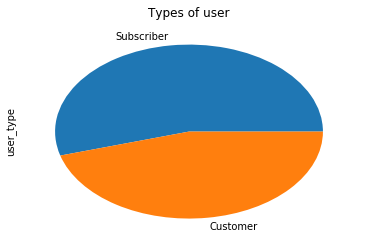

In [11]:
df.user_type.value_counts().plot(kind='pie')
plt.title('Types of user');

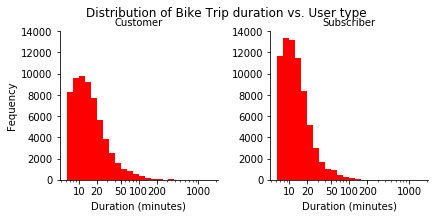

In [12]:
bin_size = 10 ** np.arange(0.8, np.log10(df.duration_in_min.max()) + 0.1, 0.1)

plot = sns.FacetGrid(data = df, col = "user_type")
plot.map(plt.hist, "duration_in_min", bins = bin_size, color='red')
plot.fig.suptitle("Distribution of Bike Trip duration vs. User type", y = 1)
plot.set_axis_labels("Duration (minutes)", "Fequency")

plt.xscale('log')
tick_locs = [10, 20,50, 100, 200, 1000]
plt.xticks(tick_locs, tick_locs)
plot.set_titles('{col_name}');

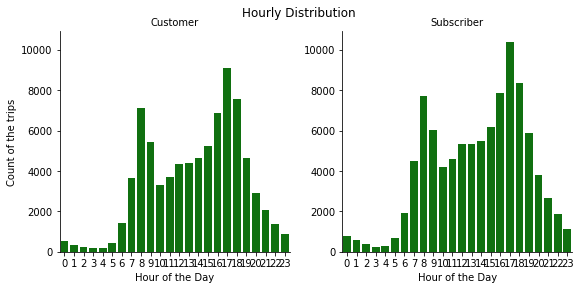

In [13]:
plot2 = sns.factorplot(data = df, x = "starting_hour", col = "user_type", 
               kind = "count", color = 'green')
plot2.fig.suptitle("Hourly Distribution", y = 1)
plot2.set_axis_labels("Hour of the Day", "Count of the trips")
plot2.set_titles("{col_name}");

In [14]:
#creatinf function for avoiding repetition of the code
def heatMap(x):
    df2 = df[df.user_type == x].groupby(["starting_hour", "starting_day"]).bike_id.size().reset_index()
    
    df2 = df2.pivot("starting_hour", "starting_day",'bike_id')
    
    sns.heatmap(df2, cmap="Blues")
    plt.title(x, y=1)
    plt.xlabel('Days of the week')
    plt.ylabel('Starting time in hour')

In [ ]:
sns.stripplot(data=df, x='starting_hour', y='duration_in_min', hue='user_type')
plt.title('Average trip duration withuser type and hours')
plt.xlabel('Start Time')
plt.ylabel('Ride Duration')
plt.legend()
plt.show()

# Hourly Usage by Weekday for Customers and Subscribers
We can conclude that the number of trips varies according to the time as well as the day of the week. The dark color depicts the more number of trips. We can see they are on Mondays and Tuesdays.

In [ ]:
plt.figure(figsize=(13,9))
plt.suptitle('Hourly use of the bikes(subs and cust)')
plt.subplot(1, 2, 1)
heatMap('Customer')
plt.subplot(1, 2, 2)
heatMap('Subscriber')


In [ ]:
!jupyter nbconvert slide_deck_FordGoBike.ipynb --to slides --post serve --template output_toggle.tpl